In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
data = pd.read_csv("data_clean.csv")
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [ ]:
data.info()

In [ ]:
print(type(data))
print(data.shape)
print(data.size)


In [ ]:
data1 = data.drop(['Unnamed: 0',"Temp C"], axis =1)
data1

In [ ]:
data.info()


In [ ]:
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

In [ ]:
data1[data1.duplicated(keep = False)]

In [ ]:
data1.drop_duplicates(keep='first',inplace=True)
data1

In [ ]:
data1.rename({'Wind':'winds'},axis=1,inplace=True)
data1

In [ ]:
data1.info()

In [ ]:
data1.isnull().sum()


In [ ]:
cols=data1.columns
colors1=['Green','Black']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors1),cbar=True)

In [ ]:
median_ozone=data1["Solar"].median()
mean_ozone=data1["Ozone"].mean()
print("Median of Solar:",median_ozone)
print("Mean of Ozone:",mean_ozone)

In [ ]:
data1['Ozone']=data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

In [ ]:
median_ozone=data1["Solar"].median()
mean_ozone=data1["Solar"].mean()
print("Median of Sloar:",median_ozone)
print("Mean of Sloar:",mean_ozone)

In [ ]:
print(data1["Weather"].value_counts())
mode_weather=data1["Weather"].mode()[0]
print(mode_weather)

In [ ]:
##detection of outlers in the columns
fig,axes=plt.subplots(2,1,figsize=(8,6),gridspec_kw={'height_ratios':[1,3]})
sns.boxplot(data=data1["Ozone"],ax=axes[0],color='Red',width=0.5,orient='h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")
sns.histplot(data1["Ozone"],kde=True,ax=axes[1],color='Green',bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
##detection of outlers in the columns
fig,axes=plt.subplots(2,1,figsize=(8,6),gridspec_kw={'height_ratios':[1,3]})
sns.boxplot(data=data1["Ozone"],ax=axes[0],color='Red',width=0.5,orient='h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Weather Levels")
sns.histplot(data1["Ozone"],kde=True,ax=axes[1],color='Green',bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(6,2))
plt.boxplot(data1["Ozone"],vert=False)

In [ ]:
plt.figure(figsize=(6,2))
boxplot_data=plt.boxplot(data1["Ozone"],vert=False)
[item.get_xdata() for item in boxplot_data['fliers']]

In [ ]:
data1["Ozone"].describe()

In [ ]:
mu=data1["Ozone"].describe()[1]
sigma=data1["Ozone"].describe()[2]
for x in data1["Ozone"]:
    if((x<(mu-3*sigma)) or (x>(mu+3*sigma))):
        print(x)

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(8,6))
stats.probplot(data1["Ozone"],dist="norm",plot=plt)
plt.title("Q-Q plot for outlier Detection",fontsize=14)
plt.xlabel("Theoretical Quantiles",fontsize=12)

##oservations from Q-Q plot



Text(0.5, 1.0, 'Violin plot')

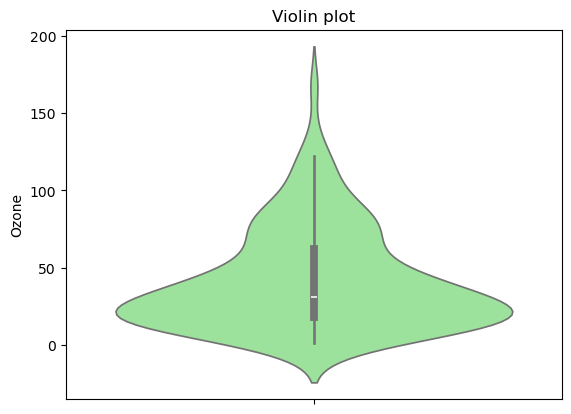

In [40]:
sns.violinplot(data=data1["Ozone"],color='lightgreen')
plt.title("Violin plot")

C:\Users\bicha\AppData\Local\Temp\ipykernel_12952\1590678044.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1,x="Weather",y="Ozone",color="orange",palette="Set2",size=6)


<Axes: xlabel='Weather', ylabel='Ozone'>

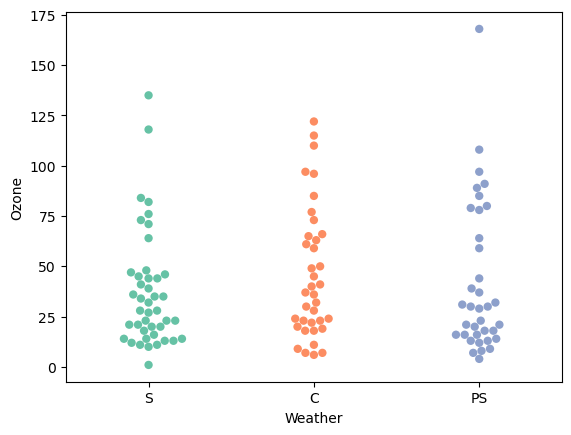

In [44]:
sns.swarmplot(data=data1,x="Weather",y="Ozone",color="orange",palette="Set2",size=6)

In [62]:
sns.striplot(data=data1,x="Weather",y="Ozone",color="orange",palette="Set1',size=6,jitter=True)

SyntaxError: unterminated string literal (detected at line 1) (1409836592.py, line 1)

<Axes: xlabel='Ozone', ylabel='Density'>

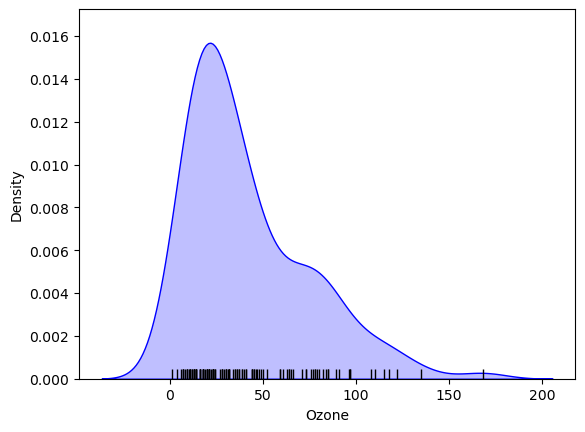

In [50]:
sns.kdeplot(data=data1["Ozone"],fill=True,color="blue")
sns.rugplot(data=data1["Ozone"],color="black")            

<Axes: xlabel='Weather', ylabel='Ozone'>

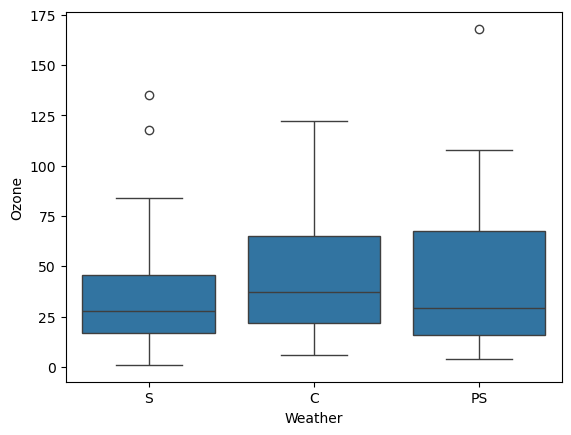

In [69]:
sns.boxplot(data = data1, x= "Weather" ,y= "Ozone")

Correlation coeffecient pair plots


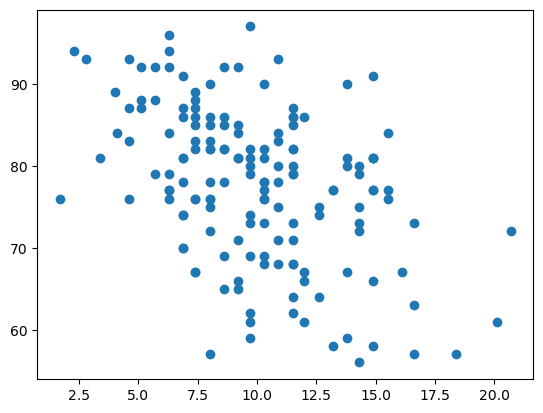

In [79]:
plt.scatter(data1["winds"],data1["Temp"])

In [81]:
data1["winds"].corr(data1["Temp"])

-0.44122806925588215

In [93]:
data1_numeric=data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar.R,winds,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,NaN,NaN,14.3,56
...,...,...,...,...
152,20.0,223.0,11.5,68
153,41.0,190.0,7.4,67
154,30.0,193.0,6.9,70
155,NaN,145.0,13.2,77
